# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/).

Some of the questions get kind of weird in this one, especially later on. **Feel free to lean on ChatGPT for the crazier ones!** It might be an interesting exploration of how to ask problems or explain what your dataset looks like.

## Do your importing and your setup

In [1]:
import pandas as pd

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [ ]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx")

df.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,18
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,12
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,11
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,17
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,11


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [ ]:
df.shape

#82,937 rows and 15 columns


(81937, 15)

In [ ]:
df.info()

#there's a difference in df.info and df.info() - second is better

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81937 entries, 0 to 81936
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Owner Zip Code          81937 non-null  int64         
 1   Animal Name             81738 non-null  object        
 2   Animal Gender           81937 non-null  object        
 3   Primary Breed           81937 non-null  object        
 4   Secondary Breed         10547 non-null  object        
 5   Animal Dominant Color   81608 non-null  object        
 6   Animal Secondary Color  56919 non-null  object        
 7   Animal Third Color      17641 non-null  object        
 8   Animal Birth            81937 non-null  datetime64[ns]
 9   Spayed or Neut          81937 non-null  object        
 10  Guard or Trained        49576 non-null  object        
 11  Vaccinated              81937 non-null  object        
 12  Application Date        81937 non-null  dateti

In [ ]:
df.columns

Index(['Owner Zip Code', 'Animal Name', 'Animal Gender', 'Primary Breed',
       'Secondary Breed', 'Animal Dominant Color', 'Animal Secondary Color',
       'Animal Third Color', 'Animal Birth', 'Spayed or Neut',
       'Guard or Trained', 'Vaccinated', 'Application Date',
       'License Issued Date', 'License Expired Date'],
      dtype='object')

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [ ]:
#Each row shows the name of a licensed pet dog, their owner's zip code (where the dog was registered) and other basic details about the dog like its color, breed birtdate, adn gender. 
#"Guard or Trained" means whether it is a guard dog which remains outside the house or a trained dog which remains at home. 
#"Spayed or Neut" means whether the dog has been spayed neutered so that it can not breed recklessly. 

# Your thoughts

Think of three questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

In [ ]:
#It's strange to see dogs named Bilal and Ali, which are Muslim names, I might want to make a list of dogs named Ali or Bilal
#How many dogs fall in a category where we know the secondary breed but not the primary breed?
#Are there more male dogs or female ones?
#What's the most popular breed?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

<Axes: ylabel='Primary Breed'>

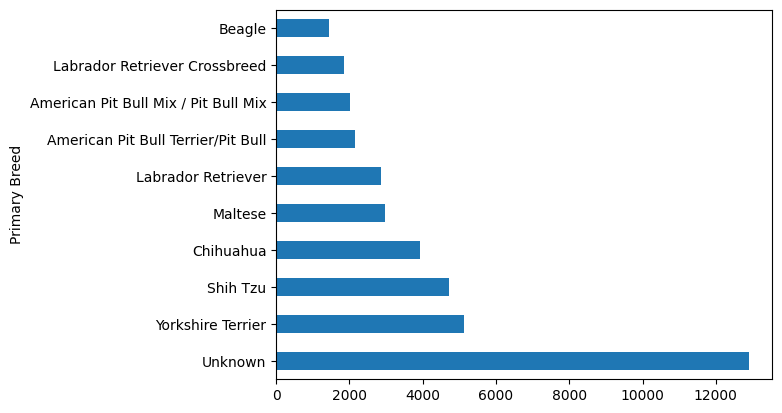

In [ ]:
df["Primary Breed"].value_counts().head(10).plot(kind="barh")



<Axes: ylabel='Secondary Breed'>

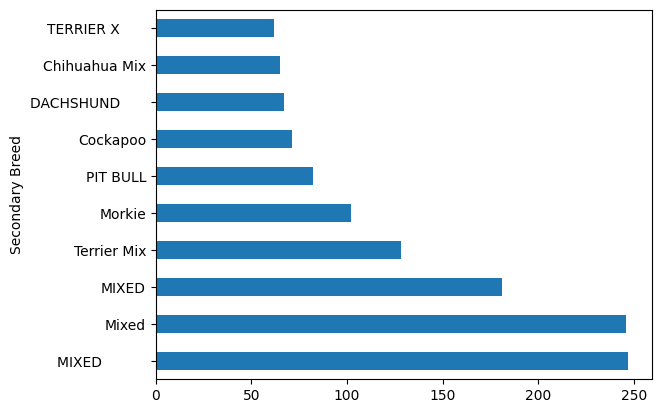

In [ ]:
df["Secondary Breed"].value_counts().head(10).plot(kind="barh")


## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

<Axes: ylabel='Primary Breed'>

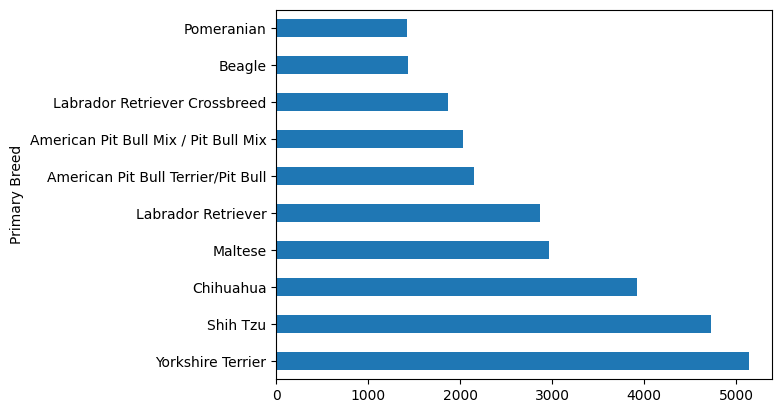

In [ ]:
df["Primary Breed"].value_counts().drop("Unknown").head(10).plot(kind="barh")

#drop("Unknown") for primary breed
#drop("Mixed") for the secondary breed

## What are the most popular dog names?

<Axes: ylabel='Animal Name'>

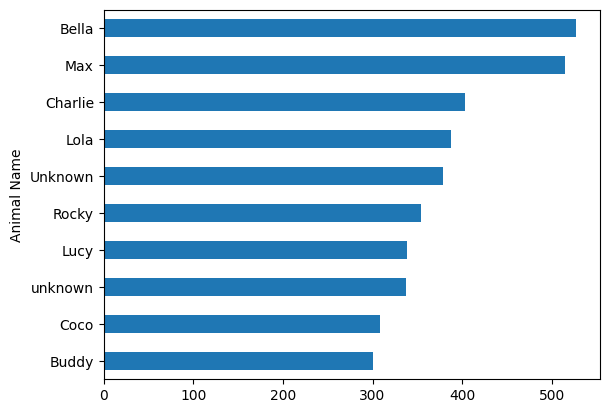

In [ ]:
df["Animal Name"].value_counts().drop("UNKNOWN").head(10).sort_values(ascending=True).plot(kind="barh")

#These are the ten most popular doggy names

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [ ]:
df["Animal Name"].isin(["Fatima"]).value_counts()

#no dogs have my first name but there is one dog who has my last name

Animal Name
False    81936
True         1
Name: count, dtype: int64

In [65]:
max_dogs = df["Animal Name"].isin(["Max"]).sum()
#515 dogs called Max

maxwell_dogs = df["Animal Name"].isin(["Maxwell"]).sum()
#30 dogs called Maxwell

dogs = max_dogs + maxwell_dogs

print(dogs)


545


## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [ ]:
yes = df[df["Guard or Trained"] == "Yes"].shape[0]

#shape[0] gives you the exact number of rows that fall in a certain category

In [ ]:
yes = df[df["Guard or Trained"] == "Yes"].shape[0]

total = df.shape[0]

percentage = yes/total *100

print(percentage)

#0.06% dogs are guard

0.06224294274869717


## What are the actual numbers?

In [ ]:
df["Guard or Trained"].value_counts(dropna=False)

Guard or Trained
No     49525
NaN    32361
Yes       51
Name: count, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [ ]:
#not really sure how to answer this

## Fill in all of those empty "Guard or Trained" columns with "No"

**We're maing a big assumption** here that if they aren't listed as guard dogs, they probably aren't guard dogs.

Look up `.fillna`. Check your result with another `.value_counts()`

In [103]:
df['Guard or Trained'] = df['Guard or Trained'].fillna('No')


#fillna is used to replace missing values (NaN) with something else.
#the format to use fillna is df["Headline"] = df["Headline"].fillna("")

df['Guard or Trained'].value_counts(dropna=False)


Guard or Trained
No     81886
Yes       51
Name: count, dtype: int64

## What are the top dog breeds for guard dogs? 

In [ ]:
top_dogs = df[df['Guard or Trained'] == 'Yes']
top_dogs['Primary Breed'].value_counts(dropna=False)

#German Shepherd, Rottweiler, and Labrador Retriever are the top guard dogs

Primary Breed
Unknown                                 11
German Shepherd Dog                      4
Rottweiler                               3
Labrador Retriever                       3
Chihuahua                                3
American Pit Bull Mix / Pit Bull Mix     3
Shih Tzu                                 2
Staffordshire Bull Terrier               2
Golden Retriever                         1
Poodle, Standard                         1
German Shepherd Crossbreed               1
Doberman Pinscher                        1
Shetland Sheepdog                        1
Yorkshire Terrier                        1
Schnauzer, Miniature                     1
Miniature Pinscher                       1
Siberian Husky                           1
Pekingese                                1
Poodle, Toy                              1
Dachshund, Long Haired                   1
Border Terrier                           1
Welsh Corgi, Pembroke                    1
Poodle, Miniature                       

In [ ]:
top_dogs['Secondary Breed'].value_counts(dropna=False)

#Chinese Crested/terrier, Black Russian/terrier, and American Fox Hound are the secondary breeds for top dogs

Secondary Breed
NaN                         40
Chinese Crested/terrier      1
black russian terrier        1
American Fox Hound           1
Poodle                       1
TERRIER MX                   1
GIANT SCHNAUZER              1
indian hound                 1
PINSCHER X                   1
STNRD SCHNAUZER              1
CORGI X                      1
Yorkie/Maltese               1
Name: count, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with `df['Animal Birth'].dt.year` or `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [111]:
df["year"] = df["Animal Birth"].dt.year

df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,18
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,12
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,11
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,17
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,11


In [113]:
df["year"] = df["Animal Birth"].apply(lambda birth: birth.year)

df.head()


,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,18
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,12
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,11
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,17
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,11


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [ ]:
df['age'] = 2025-df['year']

df['age'].mean()

#average age for dogs is 15.34

np.float64(15.341848005174707)

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

Here's an example of how you can merge two dataframes:

```python
merged = prisons_df.merge(states_df, left_on='state', right_on='name')
```

In the example above, `prisons_df` has a column called `state` that matches with the `name` column of `states_df`. The columns of `states_df` are then added to `prisons_df` and returned as a new dataframe called `merged`.

> **Rows without a match get discarded because it is an [inner join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).** I think left joins are probably the most common (keep rows from the "left" df even if they don't have a match in the right. For example, by default a prison with the state of `PUERTO RICO` would be dropped if PR wasn't in `states_df`, but if you changed it to `how='left'` it would be preserved, but the additional columns would just be `NaN`.

In [114]:
zipcodes_df = pd.read_csv('zipcodes-neighborhoods.csv')

zipcodes_df.head()

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx


In [117]:
zipcodes_df = pd.read_csv('zipcodes-neighborhoods.csv')

merged = zipcodes_df.merge(df, left_on="zip", right_on="Owner Zip Code")

merged

,neighborhood,zip,borough,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age
0,Central Bronx,10453,Bronx,10453,T-Bone,M,Bulldog,NaN,White,Tan,Apricot,2010-04-01,Yes,No,Yes,2014-11-16 16:48:08.080,2014-11-16,2016-11-16,2010,15
1,Central Bronx,10453,Bronx,10453,Cici,F,American Pit Bull Mix / Pit Bull Mix,NaN,BROWN,RUST,BLACK,2008-11-01,Yes,No,No,2015-02-06 10:35:12.917,2015-02-06,2017-04-28,2008,17
2,Central Bronx,10453,Bronx,10453,Blue,M,Basset Hound,NaN,Brown,Tan,Cream,2005-02-01,Yes,No,No,2015-02-10 16:43:24.847,2015-02-10,2017-02-10,2005,20
3,Central Bronx,10453,Bronx,10453,Boi,M,Yorkshire Terrier,NaN,Black,Gray,Tan,2011-02-01,Yes,No,Yes,2015-02-10 16:43:24.847,2015-02-10,2017-02-10,2011,14
4,Central Bronx,10453,Bronx,10453,MARSHMELLO,F,Samoyed,NaN,WHITE,NaN,NaN,2004-01-01,Yes,No,Yes,2015-03-27 14:47:53.483,2015-03-27,2017-03-30,2004,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80854,Mid-Island,10314,Staten Island,10314,Daisy,F,Shih Tzu,NaN,WHITE,TAN,BROWN,2004-01-01,Yes,No,Yes,2016-04-27 11:28:32.640,2016-04-27,2017-03-29,2004,21
80855,Mid-Island,10314,Staten Island,10314,JAKE,M,Yorkshire Terrier,NaN,BLACK,BROWN,NaN,2003-01-01,Yes,No,Yes,2016-04-27 13:40:00.460,2016-04-27,2017-05-30,2003,22
80856,Mid-Island,10314,Staten Island,10314,DAISY,F,Havanese,NaN,White,Cream,NaN,2015-12-01,No,No,Yes,2016-04-27 15:33:58.627,2016-04-27,2017-04-27,2015,10
80857,Mid-Island,10314,Staten Island,10314,Chloe,F,Yorkshire Terrier,NaN,Tan,Black,NaN,2014-08-01,Yes,No,No,2016-04-27 20:12:21.177,2016-04-27,2018-03-25,2014,11


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [ ]:
brooklyn_dogs = merged[merged["borough"] == "Brooklyn"]

brooklyn_dogs["Animal Name"].value_counts()

#Max is the most popular dog name in Brooklyn

Animal Name
unknown        234
Unknown        161
UNKNOWN        155
Max            113
Bella          112
              ... 
Bengy Lopez      1
Puddles          1
blizzard         1
Rosa             1
The Buddy        1
Name: count, Length: 9814, dtype: int64

In [ ]:
bronx_dog = merged[merged["borough"] == "Bronx"]

bronx_dog["Animal Name"].value_counts()

#Rocky is the most popular dog name in the Bronx


Animal Name
Rocky       60
Max         56
Bella       54
Lucky       51
Princess    43
            ..
Saige        1
Kiwi         1
Alejo        1
Apus         1
Magnus       1
Name: count, Length: 4980, dtype: int64

In [126]:
ues_dog = merged[merged["neighborhood"] == "Upper East Side"]

ues_dog["Animal Name"].value_counts()

#Lucy is the most popular dog name in the the Upper East Side

Animal Name
Lucy          40
Bella         31
Coco          29
Charlie       29
NO NAME       26
              ..
CYNTHIA        1
Scooter        1
Dylan Rave     1
Carolina       1
JJ             1
Name: count, Length: 3219, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [ ]:
#apply function means: “run this function on each group (or each column/row) and return the result.”

merged[merged["Primary Breed"] != "Unknown"] \
    .groupby(["neighborhood", "Primary Breed"]).size() \
    .groupby(level=0).idxmax()

#x != y checks if they are not equal, just like x == y checks that they are equal
#idxmax() is a pandas function that returns the index label of the maximum value in a Series


neighborhood
Borough Park                                     (Borough Park, Yorkshire Terrier)
Bronx Park and Fordham                 (Bronx Park and Fordham, Yorkshire Terrier)
Bushwick and Williamsburg           (Bushwick and Williamsburg, Yorkshire Terrier)
Canarsie and Flatlands                 (Canarsie and Flatlands, Yorkshire Terrier)
Central Bronx                                   (Central Bronx, Yorkshire Terrier)
Central Brooklyn                                      (Central Brooklyn, Shih Tzu)
Central Harlem                                 (Central Harlem, Yorkshire Terrier)
Central Queens                                 (Central Queens, Yorkshire Terrier)
Chelsea and Clinton                               (Chelsea and Clinton, Chihuahua)
East Harlem                                       (East Harlem, Yorkshire Terrier)
East New York and New Lots       (East New York and New Lots, American Pit Bull...
Flatbush                                                      (Flatbush, S

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

Be conscious of case-sensitivity! `WHITE` and `white` aren't the same, so you might need to standardize first.

Using `.isin` is going to be very helpful.

In [148]:
merged["Animal Dominant Color"] = merged["Animal Dominant Color"].str.lower()

merged["monochrome"] = merged["Animal Dominant Color"].isin(["white", "black", "grey"])

merged[merged["monochrome"]]




,neighborhood,zip,borough,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,...,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age,monochrome
0,Central Bronx,10453,Bronx,10453,T-Bone,M,Bulldog,NaN,white,Tan,...,2010-04-01,Yes,No,Yes,2014-11-16 16:48:08.080,2014-11-16,2016-11-16,2010,15,True
3,Central Bronx,10453,Bronx,10453,Boi,M,Yorkshire Terrier,NaN,black,Gray,...,2011-02-01,Yes,No,Yes,2015-02-10 16:43:24.847,2015-02-10,2017-02-10,2011,14,True
4,Central Bronx,10453,Bronx,10453,MARSHMELLO,F,Samoyed,NaN,white,NaN,...,2004-01-01,Yes,No,Yes,2015-03-27 14:47:53.483,2015-03-27,2017-03-30,2004,21,True
5,Central Bronx,10453,Bronx,10453,Amber,F,"Poodle, Miniature",NaN,white,NaN,...,2007-02-01,Yes,No,Yes,2015-04-17 15:35:48.417,2015-04-17,2016-05-12,2007,18,True
6,Central Bronx,10453,Bronx,10453,Blackie,F,"Poodle, Standard",NaN,black,NaN,...,2003-01-01,No,No,Yes,2015-04-29 09:04:13.047,2015-04-29,2016-05-30,2003,22,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80852,Mid-Island,10314,Staten Island,10314,Princess,F,Rottweiler,NaN,black,Brown,...,2006-09-01,Yes,No,Yes,2016-04-27 10:20:59.633,2016-04-27,2017-03-30,2006,19,True
80853,Mid-Island,10314,Staten Island,10314,Pebbles,F,Rottweiler,NaN,black,BROWN,...,2006-01-01,Yes,No,Yes,2016-04-27 10:20:59.647,2016-04-27,2017-03-30,2006,19,True
80854,Mid-Island,10314,Staten Island,10314,Daisy,F,Shih Tzu,NaN,white,TAN,...,2004-01-01,Yes,No,Yes,2016-04-27 11:28:32.640,2016-04-27,2017-03-29,2004,21,True
80855,Mid-Island,10314,Staten Island,10314,JAKE,M,Yorkshire Terrier,NaN,black,BROWN,...,2003-01-01,Yes,No,Yes,2016-04-27 13:40:00.460,2016-04-27,2017-05-30,2003,22,True


In [150]:
merged["monochrome"].sum()

#there are 40,172 dogs in monochrome

np.int64(40172)

## How many dogs are in each borough? Plot it in a graph.

<Axes: ylabel='borough'>

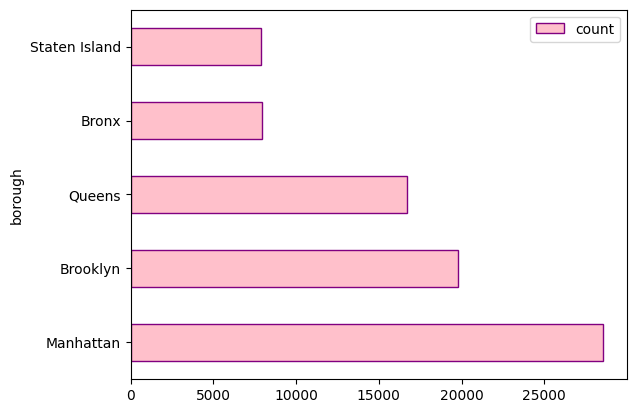

In [166]:
merged["borough"].value_counts().plot(kind="barh", color = "pink", legend= "True", edgecolor = "purple")

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [ ]:
boro_pop_df = pd.read_csv("boro_population.csv")

df.head()

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [ ]:
#merge with the existing merged dataframe on 'borough'
final_merged = merged.merge(boro_pop_df, on='borough', how='left')

final_merged

#on uses the column to merge, how keeps all the rows from merged and adds population info where available

,neighborhood,zip,borough,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,...,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age,monochrome,population,area_sqmi
0,Central Bronx,10453,Bronx,10453,T-Bone,M,Bulldog,NaN,white,Tan,...,No,Yes,2014-11-16 16:48:08.080,2014-11-16,2016-11-16,2010,15,True,1455444,42
1,Central Bronx,10453,Bronx,10453,Cici,F,American Pit Bull Mix / Pit Bull Mix,NaN,brown,RUST,...,No,No,2015-02-06 10:35:12.917,2015-02-06,2017-04-28,2008,17,False,1455444,42
2,Central Bronx,10453,Bronx,10453,Blue,M,Basset Hound,NaN,brown,Tan,...,No,No,2015-02-10 16:43:24.847,2015-02-10,2017-02-10,2005,20,False,1455444,42
3,Central Bronx,10453,Bronx,10453,Boi,M,Yorkshire Terrier,NaN,black,Gray,...,No,Yes,2015-02-10 16:43:24.847,2015-02-10,2017-02-10,2011,14,True,1455444,42
4,Central Bronx,10453,Bronx,10453,MARSHMELLO,F,Samoyed,NaN,white,NaN,...,No,Yes,2015-03-27 14:47:53.483,2015-03-27,2017-03-30,2004,21,True,1455444,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80854,Mid-Island,10314,Staten Island,10314,Daisy,F,Shih Tzu,NaN,white,TAN,...,No,Yes,2016-04-27 11:28:32.640,2016-04-27,2017-03-29,2004,21,True,474558,59
80855,Mid-Island,10314,Staten Island,10314,JAKE,M,Yorkshire Terrier,NaN,black,BROWN,...,No,Yes,2016-04-27 13:40:00.460,2016-04-27,2017-05-30,2003,22,True,474558,59
80856,Mid-Island,10314,Staten Island,10314,DAISY,F,Havanese,NaN,white,Cream,...,No,Yes,2016-04-27 15:33:58.627,2016-04-27,2017-04-27,2015,10,True,474558,59
80857,Mid-Island,10314,Staten Island,10314,Chloe,F,Yorkshire Terrier,NaN,tan,Black,...,No,No,2016-04-27 20:12:21.177,2016-04-27,2018-03-25,2014,11,False,474558,59


## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? This is very crazy, so ask in Slack, or a TA, or our buddy ChatGPT.

<Axes: ylabel='Primary Breed'>

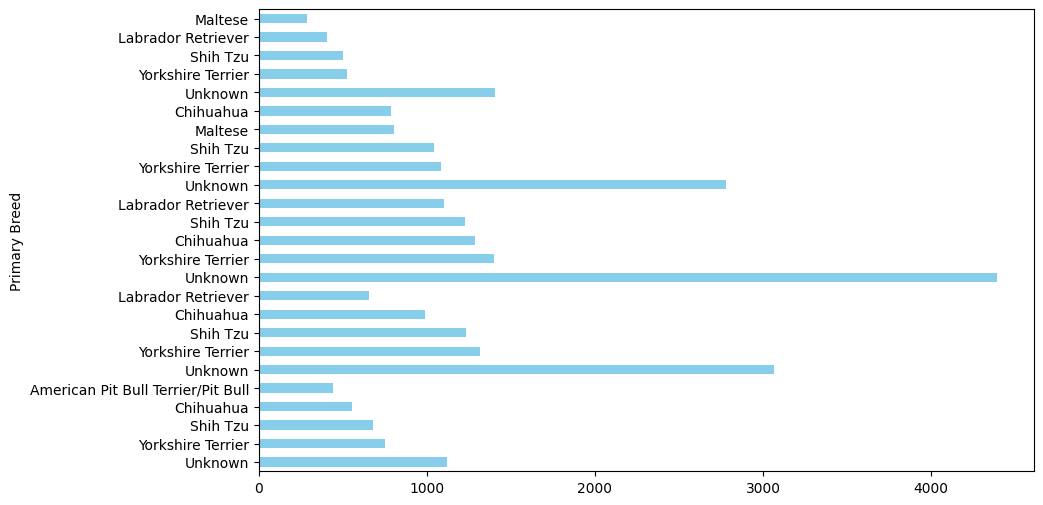

In [181]:
breed_counts = final_merged.groupby("borough")["Primary Breed"].value_counts()

#count breeds within each borough

top5_breeds = breed_counts.groupby(level=0).head(5)

#top5 breeds

top5_df = top5_breeds.reset_index(name="count")

# Convert to DataFrame for plotting

top5_df.plot(
    kind="barh",
    x="Primary Breed",
    y="count",
    color="skyblue",
    figsize=(10,6),
    legend=False
)


